In [21]:
import matplotlib.pyplot as plt
import tensorflow as tf

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [22]:
train_images.shape

(60000, 28, 28)

In [23]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [24]:
test_images.shape

(10000, 28, 28)

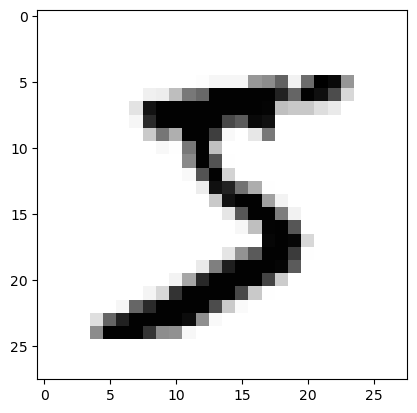

In [25]:
plt.imshow(train_images[0], cmap="Greys")

In [26]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))

In [27]:
model.compile(optimizer='Adam',
                loss='mse',
                metrics=['accuracy'])

In [28]:
train_images = train_images.reshape((60000, 784))
train_images = train_images.astype('float32') / 255.0

test_images = test_images.reshape((10000, 784))
test_images = test_images.astype('float32') / 255.0

In [29]:
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [30]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 129us/sample - loss: 0.0206 - accuracy: 0.8817
Epoch 2/5
60000/60000 [==============================] - 10s 165us/sample - loss: 0.0078 - accuracy: 0.9571
Epoch 3/5
60000/60000 [==============================] - 11s 178us/sample - loss: 0.0055 - accuracy: 0.9714
Epoch 4/5
60000/60000 [==============================] - 10s 169us/sample - loss: 0.0042 - accuracy: 0.9789
Epoch 5/5
60000/60000 [==============================] - 11s 180us/sample - loss: 0.0034 - accuracy: 0.9832


In [31]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('테스트 정확도:', test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

테스트 정확도: 0.9782


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 12s 199us/sample - loss: 0.0027 - accuracy: 0.9868
Epoch 2/5
60000/60000 [==============================] - 11s 181us/sample - loss: 0.0023 - accuracy: 0.9891
Epoch 3/5
60000/60000 [==============================] - 11s 190us/sample - loss: 0.0019 - accuracy: 0.9909
Epoch 4/5
60000/60000 [==============================] - 10s 171us/sample - loss: 0.0017 - accuracy: 0.9924
Epoch 5/5
60000/60000 [==============================] - 8s 135us/sample - loss: 0.0014 - accuracy: 0.9936


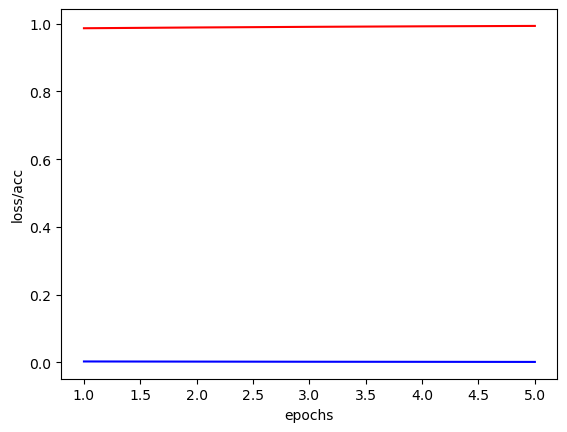

In [32]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=128)
loss = history.history['loss']
acc = history.history['accuracy']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, acc, 'r', label='Accuracy')
plt.xlabel('epochs')
plt.ylabel('loss/acc')
plt.show()